In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Load the datasets
low_scrap = pd.read_csv('/teamspace/studios/this_studio/dataset/low_scrap.csv')
high_scrap = pd.read_csv('/teamspace/studios/this_studio/dataset/high_scrap.csv')

# Quick look at the data structure
print("Low Scrap Data Preview:")
print(low_scrap.head())
print("\nHigh Scrap Data Preview:")
print(high_scrap.head())


Low Scrap Data Preview:
   Station1_mp_0  Station1_mp_1  Station1_mp_2  Station1_mp_3  Station1_mp_4  \
0       0.000164           10.0            2.0       0.000224           15.0   
1       0.000240            8.0            2.0       0.000219           17.0   
2       0.000160           11.0            3.0       0.000189           14.0   
3       0.000173            9.0            3.0       0.000219           17.0   
4       0.000212            9.0            2.0       0.000205           13.0   

   Station1_mp_5  Station2_mp_6  Station2_mp_7  Station2_mp_8  Station2_mp_9  \
0            3.0   37577.464524       0.003730       55728.48       38647.52   
1            4.0   38731.386253       0.003738       56068.79       38993.59   
2            4.0   39404.300798       0.003647       56295.66       39024.36   
3            4.0   37393.410715       0.003700       54588.34       37205.51   
4            4.0   39265.722068       0.003616       55140.14       37751.55   

   ...  Statio

Missing values in Low Scrap dataset:
0

Missing values in High Scrap dataset:
0

Statistical Summary for Low Scrap Data:
       Station1_mp_0  Station1_mp_1  Station1_mp_2  Station1_mp_3  \
count    2500.000000    2500.000000    2500.000000    2500.000000   
mean        0.000187       8.064400       2.469600       0.000212   
std         0.000028       1.621266       0.561785       0.000026   
min         0.000098       5.000000       1.000000       0.000125   
25%         0.000168       7.000000       2.000000       0.000193   
50%         0.000185       8.000000       2.000000       0.000209   
75%         0.000206       9.000000       3.000000       0.000229   
max         0.000283      14.000000       4.000000       0.000297   

       Station1_mp_4  Station1_mp_5  Station2_mp_6  Station2_mp_7  \
count    2500.000000     2500.00000    2500.000000    2500.000000   
mean       14.192400        4.41560   37988.198552       0.003659   
std         1.558574        0.85321    1645.851064

       Station1_mp_0  Station1_mp_1  Station1_mp_2  Station1_mp_3  \
count    2500.000000    2500.000000    2500.000000    2500.000000   
mean        0.000188       8.048000       2.473200       0.000211   
std         0.000028       1.606589       0.589763       0.000026   
min         0.000099       4.000000       1.000000       0.000132   
25%         0.000168       7.000000       2.000000       0.000192   
50%         0.000185       8.000000       2.000000       0.000208   
75%         0.000207       9.000000       3.000000       0.000229   
max         0.000315      13.000000       4.000000       0.000291   

       Station1_mp_4  Station1_mp_5  Station2_mp_6  Station2_mp_7  \
count    2500.000000    2500.000000    2500.000000    2500.000000   
mean       14.150800       4.412000   37925.320013       0.003659   
std         1.590305       0.852846    1643.868662       0.000032   
min        10.000000       2.000000   32218.591921       0.003555   
25%        13.000000       4.0000

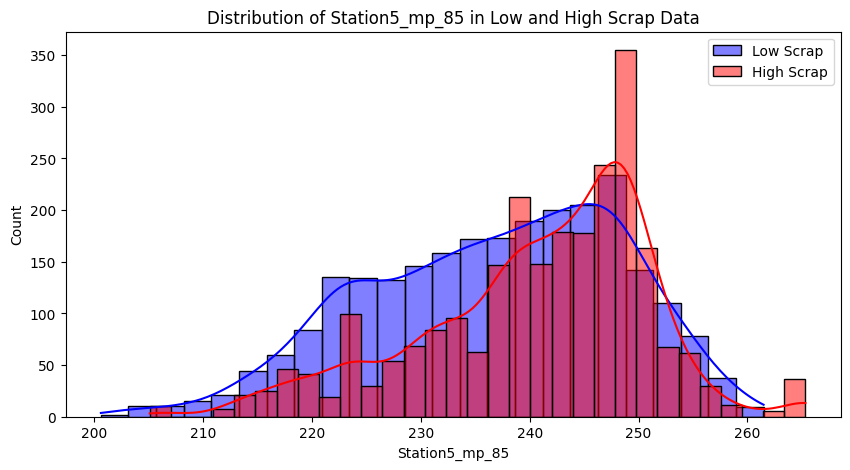

In [3]:
# Checking for missing values in both datasets
print("Missing values in Low Scrap dataset:")
print(low_scrap.isnull().sum().sum())
print("\nMissing values in High Scrap dataset:")
print(high_scrap.isnull().sum().sum())

# Statistical summary of the datasets
print("\nStatistical Summary for Low Scrap Data:")
print(low_scrap.describe())
print("\nStatistical Summary for High Scrap Data:")
print(high_scrap.describe())

# Optionally, visualize some distributions
import seaborn as sns

# Plotting distribution of a specific column, e.g., Station5_mp_85
plt.figure(figsize=(10, 5))
sns.histplot(low_scrap['Station5_mp_85'], color='blue', kde=True, label='Low Scrap')
sns.histplot(high_scrap['Station5_mp_85'], color='red', kde=True, label='High Scrap')
plt.title('Distribution of Station5_mp_85 in Low and High Scrap Data')
plt.legend()
plt.show()


  0%|          | 0/96 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pgmpy/base/DAG.py:1195: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


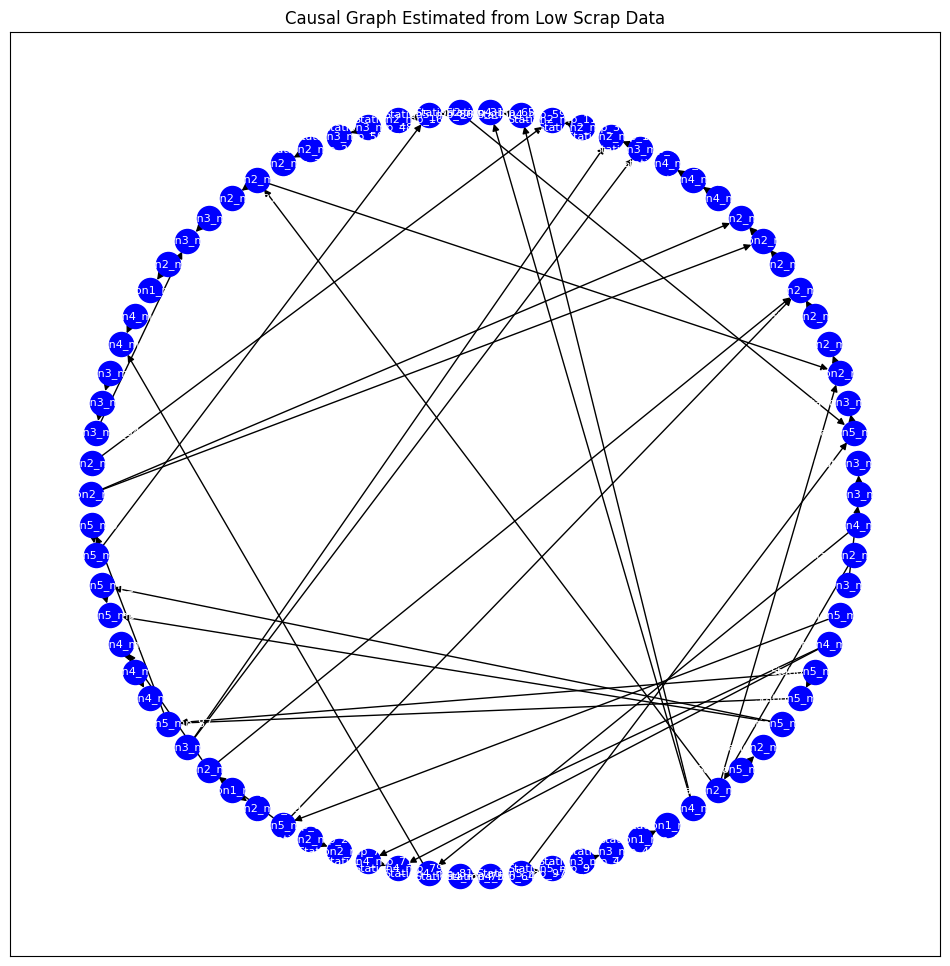

In [4]:
from pgmpy.estimators import PC
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Create DataFrame from the scaled data, maintaining the column names
low_scrap_scaled_df = pd.DataFrame(scaler.fit_transform(low_scrap), columns=low_scrap.columns)
high_scrap_scaled_df = pd.DataFrame(scaler.fit_transform(high_scrap), columns=high_scrap.columns)

# Initialize the PC algorithm from pgmpy
c = PC(low_scrap_scaled_df)
max_cond_vars = len(low_scrap_scaled_df.columns) - 2  # A parameter that can be tuned
model = c.estimate(return_type='dag', significance_level=0.02, max_cond_vars=max_cond_vars, ci_test='pearsonr')

# Visualizing the causal graph
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())
pos = nx.layout.circular_layout(nx_graph)
plt.figure(figsize=(12, 12))
nx.draw_networkx(nx_graph, pos, arrows=True, node_color='blue', edge_color='#000000', font_size=8, font_color='white')
plt.title('Causal Graph Estimated from Low Scrap Data')
plt.show()


  0%|          | 0/96 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pgmpy/base/DAG.py:1195: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


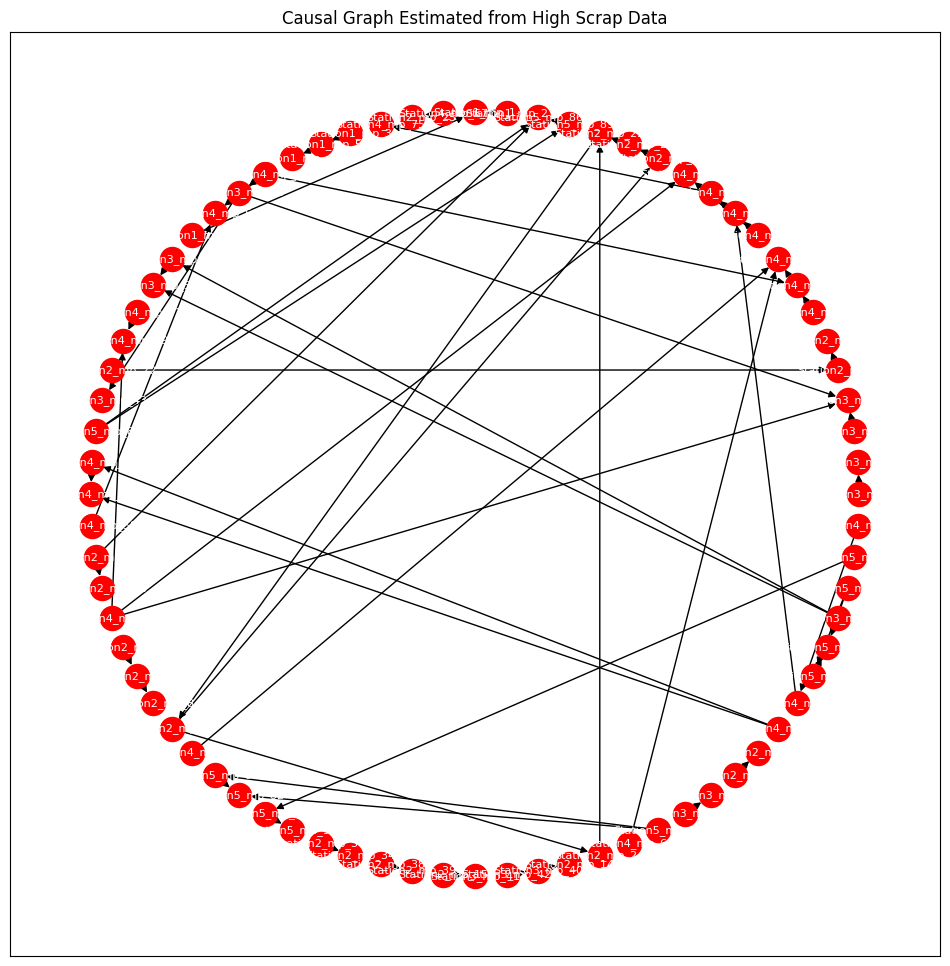

In [5]:
# Applying the PC algorithm to the High Scrap dataset
c_high = PC(high_scrap_scaled_df)
max_cond_vars_high = len(high_scrap_scaled_df.columns) - 2  # Adjust based on your dataset
model_high = c_high.estimate(return_type='dag', significance_level=0.02, max_cond_vars=max_cond_vars_high, ci_test='pearsonr')

# Visualizing the causal graph for High Scrap
nx_graph_high = nx.DiGraph()
nx_graph_high.add_edges_from(model_high.edges())
pos_high = nx.layout.circular_layout(nx_graph_high)
plt.figure(figsize=(12, 12))
nx.draw_networkx(nx_graph_high, pos_high, arrows=True, node_color='red', edge_color='#000000', font_size=8, font_color='white')
plt.title('Causal Graph Estimated from High Scrap Data')
plt.show()


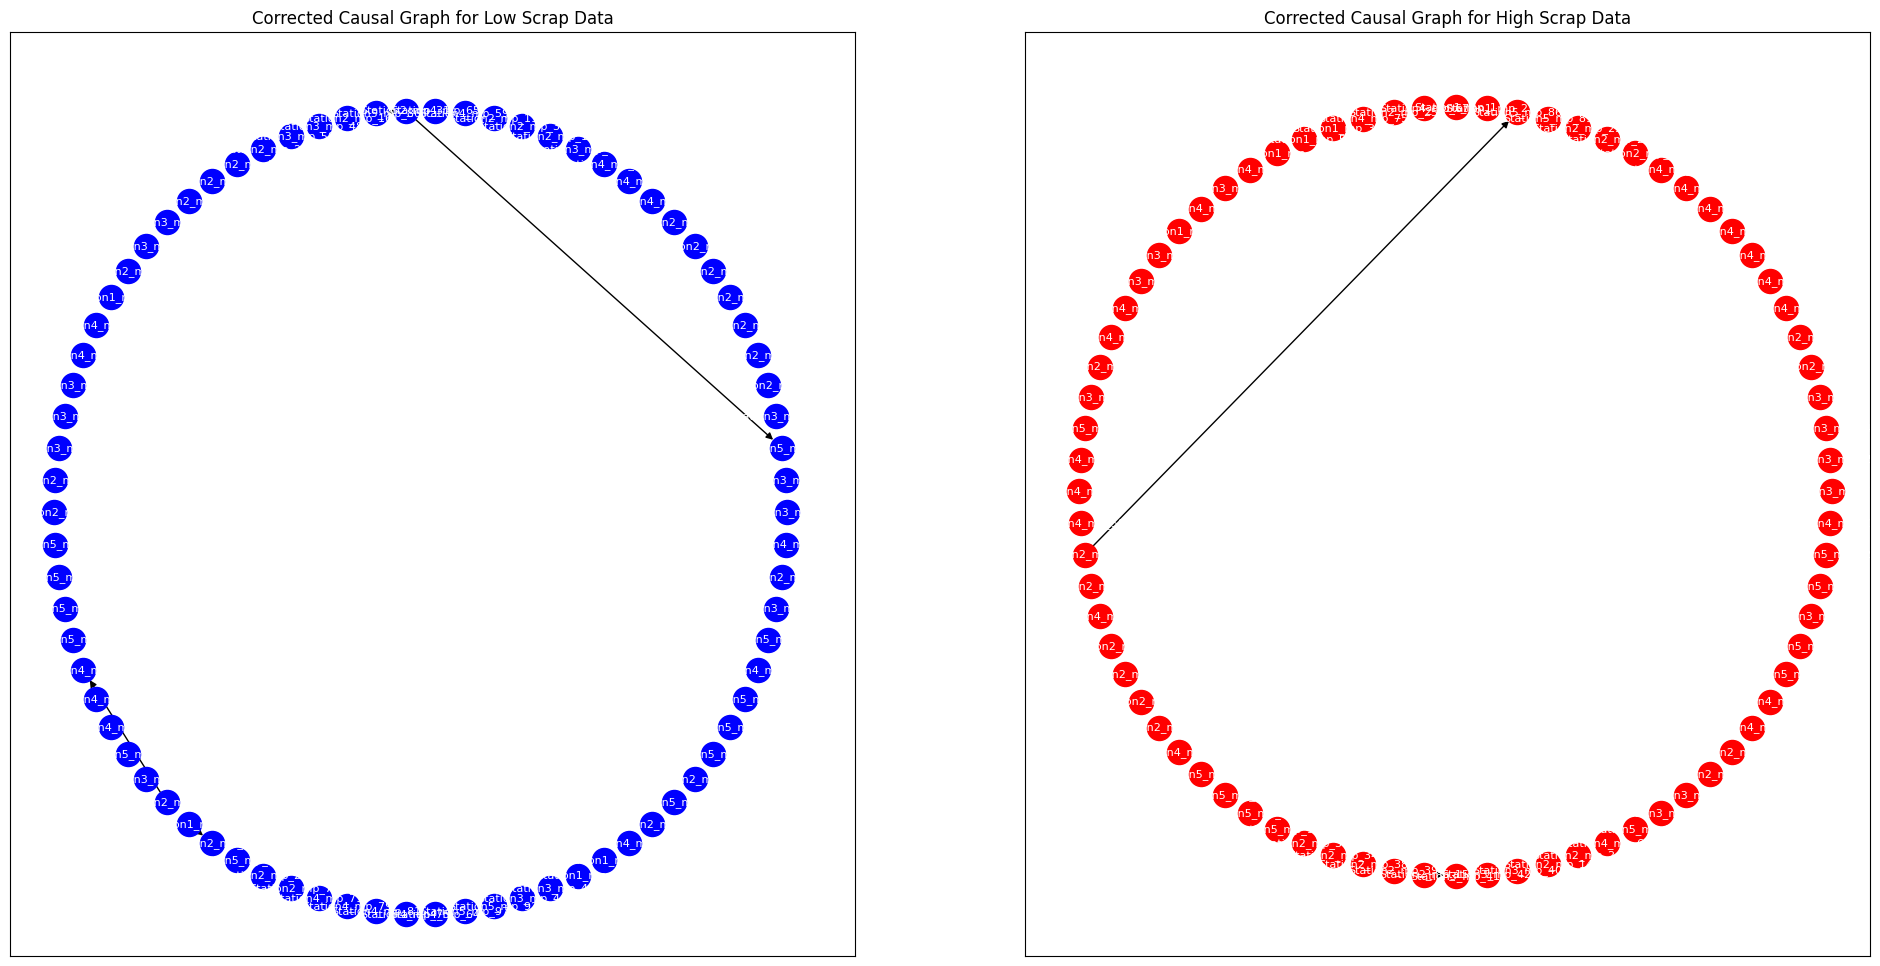

In [6]:
# Post-processing the graph to ensure station sequence constraints
def enforce_station_sequence(graph, columns):
    for edge in list(graph.edges()):
        # Extracting station numbers from column names
        start_station = int(edge[0].split('_')[0].replace('Station', ''))
        end_station = int(edge[1].split('_')[0].replace('Station', ''))
        if start_station >= end_station:  # If the start station is not before the end station
            graph.remove_edge(*edge)

# Apply the function to both graphs
enforce_station_sequence(nx_graph, low_scrap_scaled_df.columns)
enforce_station_sequence(nx_graph_high, high_scrap_scaled_df.columns)

# Re-visualizing the corrected graph for both datasets
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
nx.draw_networkx(nx_graph, pos, arrows=True, node_color='blue', edge_color='#000000', font_size=8, font_color='white')
plt.title('Corrected Causal Graph for Low Scrap Data')

plt.subplot(1, 2, 2)
nx.draw_networkx(nx_graph_high, pos_high, arrows=True, node_color='red', edge_color='#000000', font_size=8, font_color='white')
plt.title('Corrected Causal Graph for High Scrap Data')
plt.show()


In [11]:
nx_graph_high.edges()

OutEdgeView([('Station2_mp_31', 'Station5_mp_86'), ('Station2_mp_15', 'Station3_mp_41')])

In [7]:
# Identify new and removed edges
new_edges = set(nx_graph_high.edges()) - set(nx_graph.edges())
removed_edges = set(nx_graph.edges()) - set(nx_graph_high.edges())

print("New edges in High Scrap graph:", new_edges)
print("Removed edges in Low Scrap graph:", removed_edges)


New edges in High Scrap graph: {('Station2_mp_15', 'Station3_mp_41')}
Removed edges in Low Scrap graph: {('Station1_mp_0', 'Station2_mp_39'), ('Station2_mp_13', 'Station4_mp_61'), ('Station2_mp_31', 'Station5_mp_94')}


In [8]:
# Edges impacting Station5_mp_85
edges_impacting_target_low = [edge for edge in nx_graph.edges() if 'Station5_mp_85' in edge]
edges_impacting_target_high = [edge for edge in nx_graph_high.edges() if 'Station5_mp_85' in edge]

print("Edges impacting Station5_mp_85 in Low Scrap:", edges_impacting_target_low)
print("Edges impacting Station5_mp_85 in High Scrap:", edges_impacting_target_high)


Edges impacting Station5_mp_85 in Low Scrap: []
Edges impacting Station5_mp_85 in High Scrap: []


In [9]:
import networkx as nx

# Function to find all paths to a given node (target)
def find_all_paths_to_target(graph, target):
    paths = []
    for node in graph.nodes():
        if node != target:
            for path in nx.all_simple_paths(graph, source=node, target=target):
                paths.append(path)
    return paths

# Find all paths to 'Station5_mp_85' in both graphs
paths_to_target_low = find_all_paths_to_target(nx_graph, 'Station5_mp_85')
paths_to_target_high = find_all_paths_to_target(nx_graph_high, 'Station5_mp_85')

# Print out the results
print("All paths leading to 'Station5_mp_85' in Low Scrap:")
for path in paths_to_target_low:
    print(path)

print("\nAll paths leading to 'Station5_mp_85' in High Scrap:")
for path in paths_to_target_high:
    print(path)


All paths leading to 'Station5_mp_85' in Low Scrap:

All paths leading to 'Station5_mp_85' in High Scrap:
